### I. Data Dictionary :

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest Pain 
   - ~ 0 = Typical Angina
   - ~ 1 = Atypical Angina
   - ~ 2 = Non-anginal Pain
   - ~ 3 = Asymptomatic
   
`trtps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (Fasting blood sugar > 120 mg/dl) 
   - ~ 1 = True
   - ~ 0 = False
   
`restecg` - Resting electrocardiographic results
   - ~ 0 = Normal
   - ~ 1 = ST-T wave normality
   - ~ 2 = Left ventricular hypertrophy
   
`thalachh` - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina 
   - ~ 1 = Yes
   - ~ 0 = No
   
`output` = Target variable

### II. Objective
*Conducting Exploratory Data Analysis(EDA) with the goal of forecasting the likelihood of an individual experiencing a heart attack.*

### III. Preparation

#### 1. Importing the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing the data

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Jupyter Notebooks\\Datasets\\kaggle\\heart-attack-analysis-prediction-dataset\\heart.csv")

In [3]:
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

#### 3. Understanding the data

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


#### 3.1 Preview the first 5 rows of the data

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 3.2 Checking the number of unique values in each column

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### 3.3 Separating the columns into categorical and continuous

In [7]:
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
target_col = ["output"]

print("The Categorical columns are  : ", cat_cols)
print("The Continuous columns are : ", con_cols)
print("The target variable is :", target_col) 

The Categorical columns are  :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The Continuous columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is : ['output']


#### 3.4 Statistical Summaries

In [8]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### 3.5 Checking for missing values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### IV. Exploratory Data Analysis

1. Distribution of Target Variable:


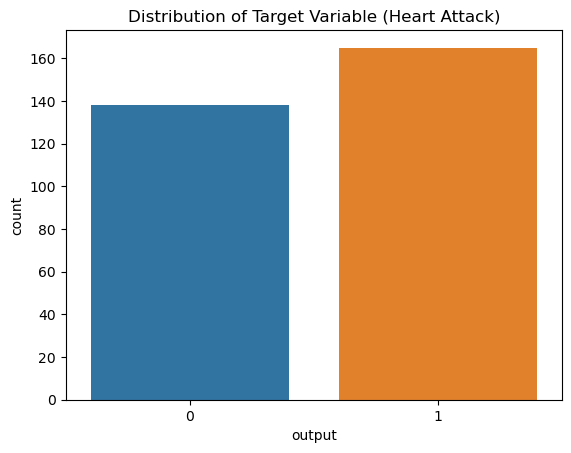

In [10]:
sns.countplot(x='output',data=df)
plt.title('Distribution of Target Variable (Heart Attack)')
plt.show()

2. Correlation Matrix Heatmap:

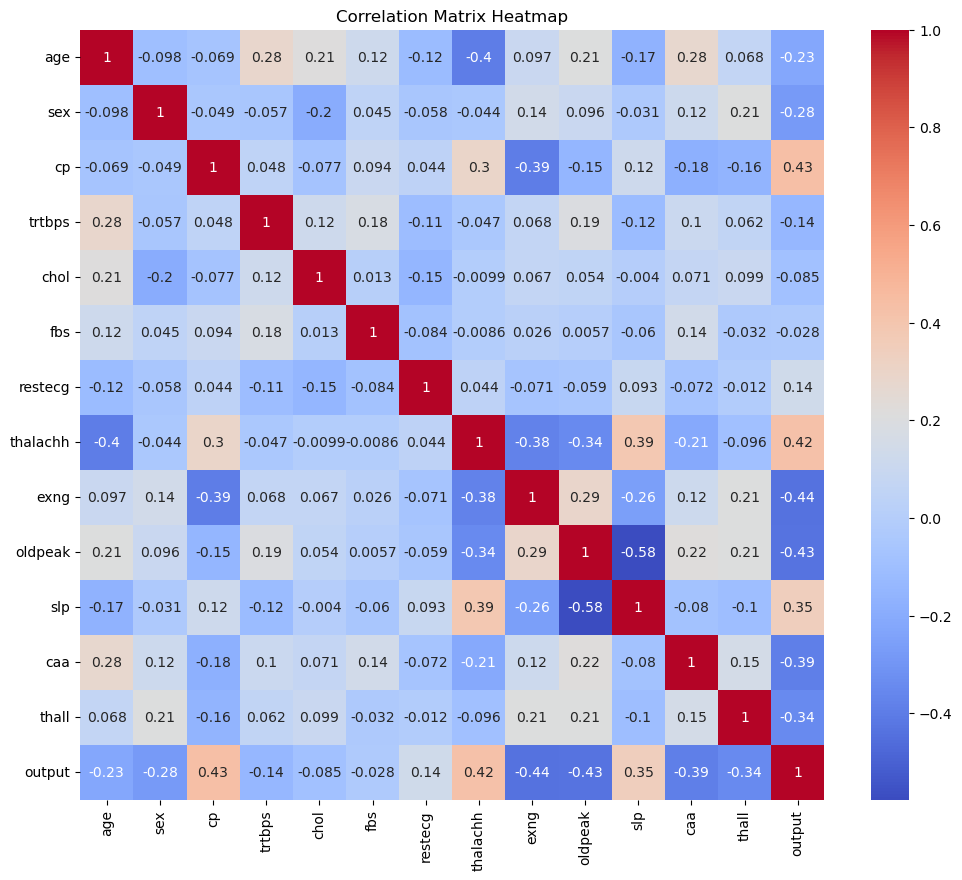

In [11]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

4. Barplot of Chest Pain Types:

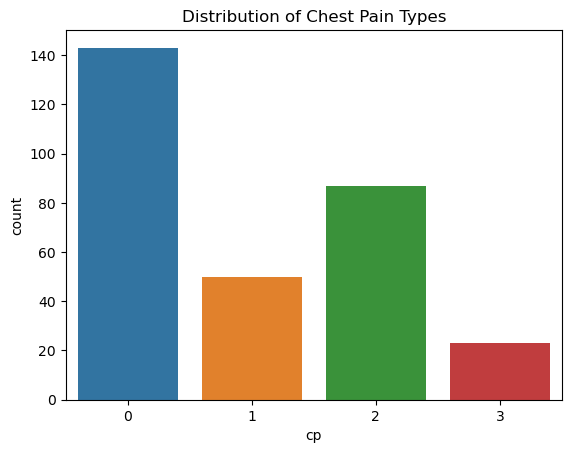

In [12]:
sns.countplot(x='cp', data=df)
plt.title('Distribution of Chest Pain Types')
plt.show()

5. Fasting Blood Sugar:

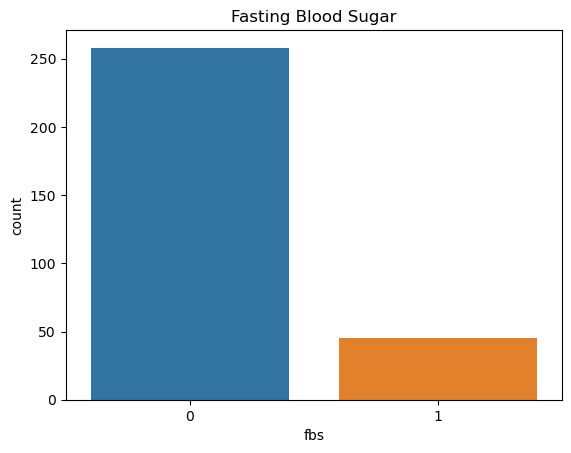

In [13]:
sns.countplot(x='fbs',data=df)
plt.title("Fasting Blood Sugar")
plt.show()

6. Breakdown of ECG:

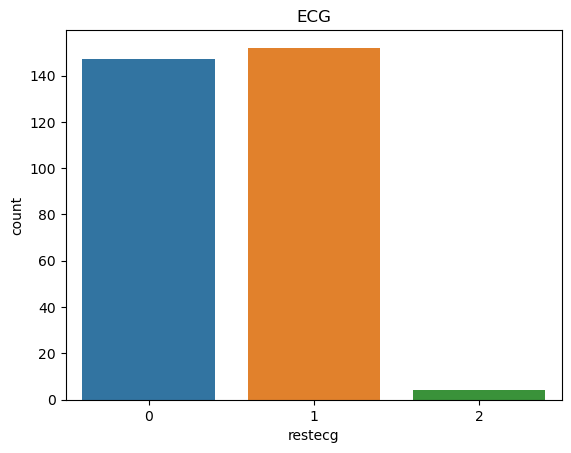

In [14]:
sns.countplot(x='restecg', data=df)
plt.title("ECG")
plt.show()

7. Breakdown for Exercise Induced Angina:

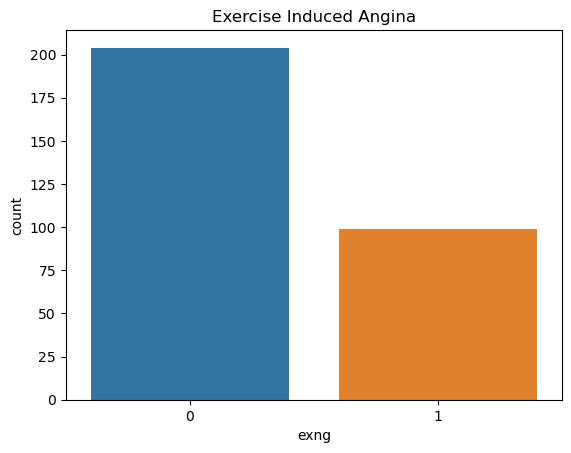

In [15]:
sns.countplot(x='exng', data=df)
plt.title("Exercise Induced Angina")
plt.show()

8. Breakdown for Thalium Stress:


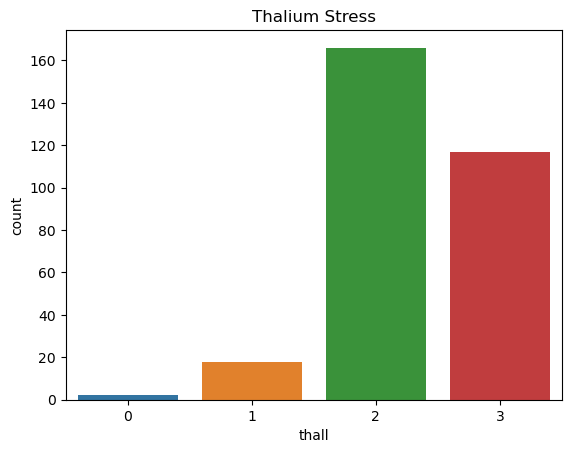

In [16]:
sns.countplot(x='thall', data=df)
plt.title("Thalium Stress")
plt.show()

9. Density distribution by Age:

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


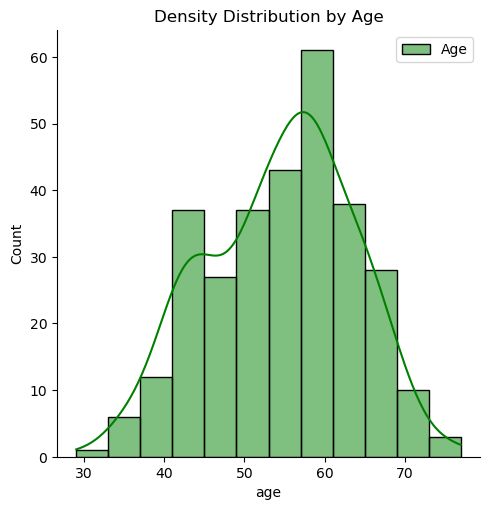

In [17]:
sns.displot(df.age, color="green", label="Age", kde=True)
plt.title("Density Distribution by Age")
plt.legend()
plt.show()

10. Resting Blood Pressure:

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


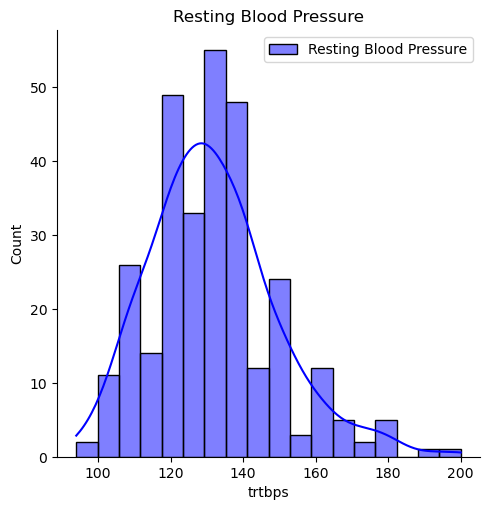

In [18]:
sns.displot(x='trtbps', data=df, color='blue', label='Resting Blood Pressure', kde=True)
plt.title("Resting Blood Pressure")
plt.legend()
plt.show()

11. Boxplot of Resting Blood Pressure(trtbps) by Chest Pain Type(cp):

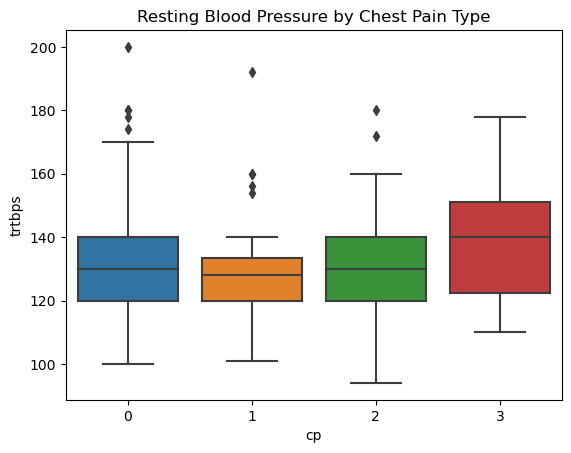

In [19]:
sns.boxplot(x='cp', y='trtbps', data=df)
plt.title('Resting Blood Pressure by Chest Pain Type')
plt.show()

12. Pairplot for Selected Features:

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


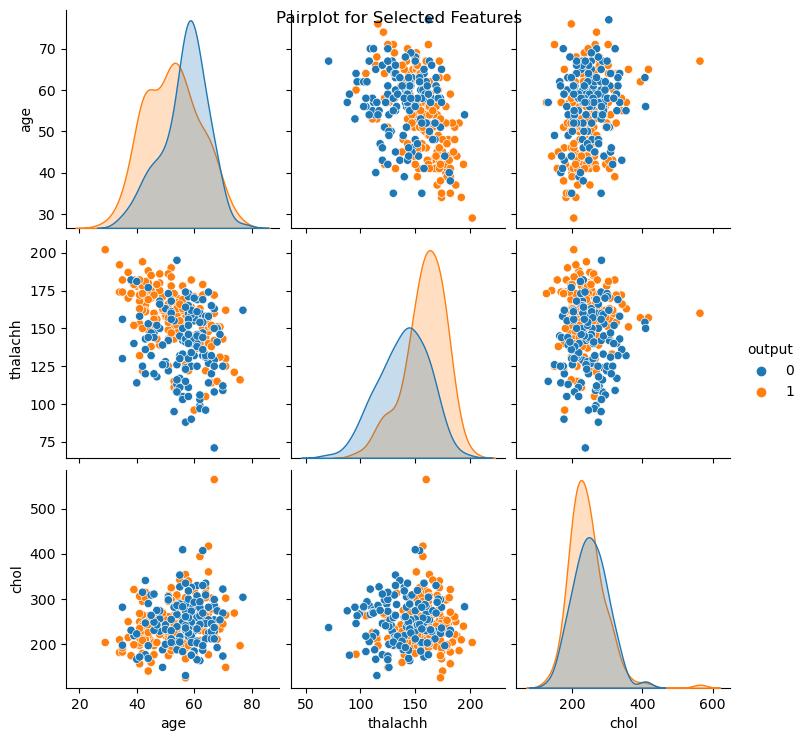

In [20]:
sns.pairplot(df[['age','thalachh', 'chol', 'output']], hue='output')
plt.suptitle('Pairplot for Selected Features')
plt.show()

 Thalium Stress Test Result vs Maximum Heart Rate:

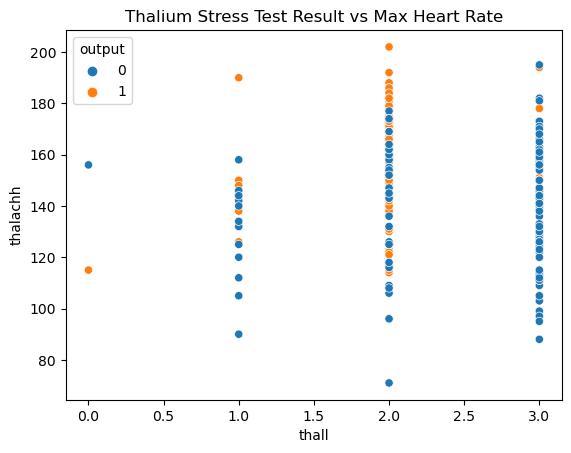

In [21]:
sns.scatterplot(x='thall', y='thalachh', data=df, hue='output')
plt.title('Thalium Stress Test Result vs Max Heart Rate')
plt.show()

###  Heart Attack vs Age :

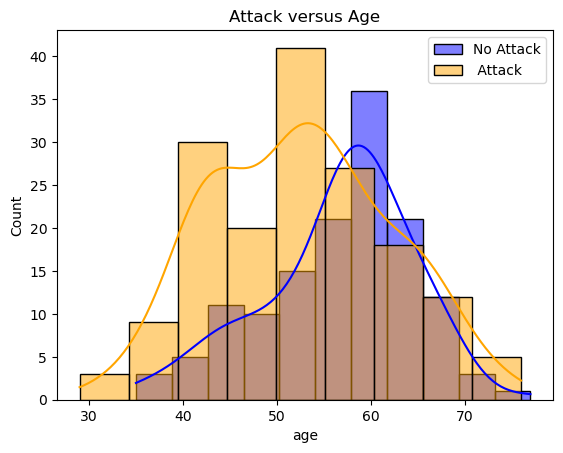

In [22]:
sns.histplot(df[df['output'] == 0]["age"], color='blue',kde=True, label= "No Attack")
sns.histplot(df[df['output'] == 1]["age"], color='orange',kde=True, label = " Attack")
plt.title('Attack versus Age')
plt.legend()
plt.show()

### Heart Attack vs Cholestrol:

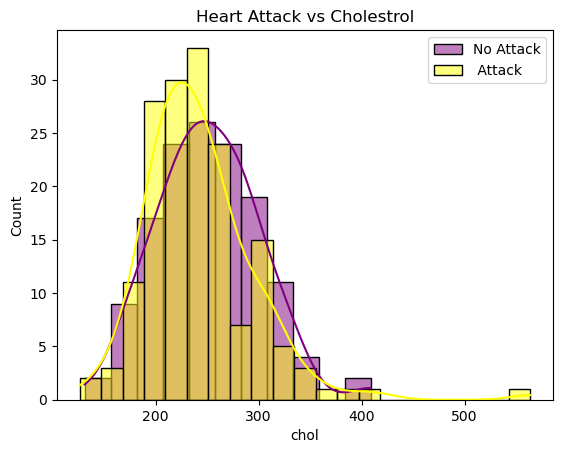

In [23]:
sns.histplot(df[df["output"] == 0]["chol"], color="purple", kde=True,label="No Attack")
sns.histplot(df[df["output"] == 1]["chol"], color="yellow", kde=True, label=" Attack")
plt.title("Heart Attack vs Cholestrol")
plt.legend()
plt.show()

### Heart Attack vs Resting Blood Pressure:

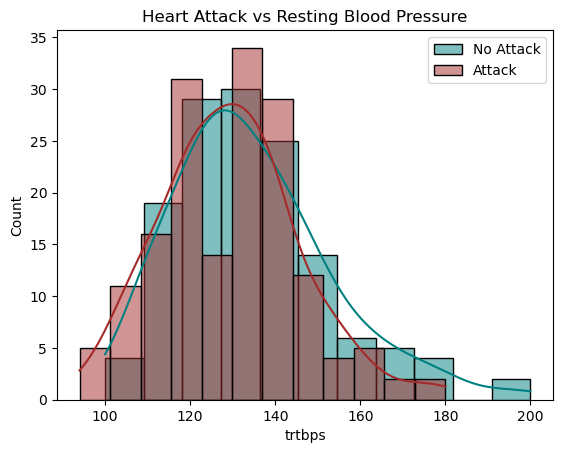

In [24]:
sns.histplot(df[df["output"] == 0]["trtbps"],color='teal',kde=True, label="No Attack")
sns.histplot(df[df["output"] == 1]["trtbps"],color="brown",kde=True, label="Attack")
plt.title("Heart Attack vs Resting Blood Pressure")
plt.legend()
plt.show()

### Heart Attack vs Maximum Heart Rate:

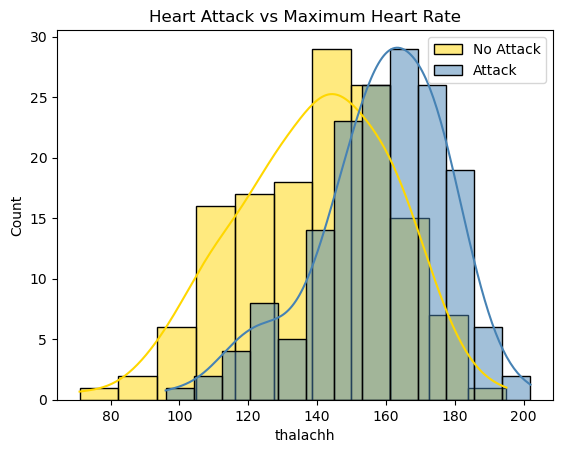

In [25]:
sns.histplot(df[df["output"] == 0]["thalachh"],color="gold",kde=True,label="No Attack")
sns.histplot(df[df["output"] == 1]["thalachh"],color="steelblue",kde=True,label="Attack")
plt.title("Heart Attack vs Maximum Heart Rate")
plt.legend()
plt.show()

Splitting the dataset into training and testing data:

In [26]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [28]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (242, 12) (242,)
Shape for testing data (61, 12) (61,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_train,x_test

(array([[-1.43641607,  0.98584243, -0.57412513, ..., -0.66169316,
         -0.70710678, -0.46472917],
        [-1.43641607,  0.98584243,  0.83106608, ..., -0.66169316,
          0.26516504, -0.46472917],
        [ 0.69617712,  0.98584243,  0.47976828, ...,  0.95577901,
         -0.70710678, -0.46472917],
        ...,
        [ 0.69617712,  1.94013791, -0.69122439, ..., -0.66169316,
         -0.70710678,  1.14190596],
        [ 0.69617712,  0.98584243,  0.36266901, ...,  0.95577901,
         -0.70710678, -0.46472917],
        [ 0.69617712,  0.03154696, -0.69122439, ..., -0.66169316,
         -0.70710678, -0.46472917]]),
 array([[ 0.69617712, -0.92274852,  0.77251645, -1.36354075, -0.41803981,
          0.90163913, -1.07375268,  1.40984195,  1.2900049 , -2.27916533,
         -0.70710678,  1.14190596],
        [ 0.69617712,  1.94013791,  2.23625729, -0.3703119 , -0.41803981,
         -0.97936664,  0.22375805, -0.70929937, -0.38883987, -0.66169316,
         -0.70710678,  1.14190596],
     

#### 1. Logistic Regression

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)

accuracy = accuracy_score(y_test, predicted) * 100
rounded_accuracy = round(accuracy,2)
print ("Confusion Matrix : \n", conf)
print ("\nAccuracy of the Logistic Regression Model is",rounded_accuracy, "%")

Confusion Matrix : 
 [[21  6]
 [ 4 30]]

Accuracy of the Logistic Regression Model is 83.61 %


#### 2. Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted) * 100
rounded_accuracy = round(accuracy,2)

print("Accuracy of the Gaussian Naive Bayes Model is",rounded_accuracy,"%")

Accuracy of the Gaussian Naive Bayes Model is 86.89 %


#### 3. Bernoulli Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted) * 100
rounded_accuracy = round(accuracy,2)

print("Accuracy of the Bernoulli Naive Bayes Model is",rounded_accuracy,"%")


Accuracy of the Bernoulli Naive Bayes Model is 88.52 %


#### 4. Support Vector Machine

In [47]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)*100
rounded_accuracy = round(accuracy,2)

print("Accuracy of the Support Vector Machine model is",rounded_accuracy,"%")

Accuracy of the Support Vector Machine model is 86.89 %


#### 5. Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted.round())*100
rounded_accuracy = round(accuracy,2)

print("Accuracy of the Random Forest Model is",rounded_accuracy,"%")

Accuracy of the Random Forest Model is 85.25 %


#### 6. K Nearest Neighbours


In [67]:
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier (n_neighbors = 1)

model.fit(x_train,y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted) *100
rounded_accuracy = round(accuracy,2)

print("Confusion Matrix is \n", confusion_matrix(y_test,predicted))

print("\n Accuracy of the K Neighbors Classifier Model is",rounded_accuracy,"%")

Confusion Matrix is 
 [[22  5]
 [ 8 26]]

 Accuracy of the K Neighbors Classifier Model is 78.69 %


#### 7. X Gradient Boosting

In [70]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train,y_train)
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)*100
rounded_accuracy = round(accuracy,2)

print("Accuract of X Gradient Boosting Model is",rounded_accuracy,"%")

Accuract of X Gradient Boosting Model is 80.33 %


### Conclusion

1. Most of the models perform well.
2. The Gaussian Naive Bayes and the Support Vector Machine models work the best for the given dataset.